In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
iris = pd.read_csv('iris.csv')

In [3]:
iris.head(5)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [9]:
iris.loc[0:1]

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa


In [10]:
iris.loc[50:51]

,sepal_length,sepal_width,petal_length,petal_width,species
50,7.0,3.2,4.7,1.4,versicolor
51,6.4,3.2,4.5,1.5,versicolor


In [11]:
iris.loc[100:101]

,sepal_length,sepal_width,petal_length,petal_width,species
100,6.3,3.3,6.0,2.5,virginica
101,5.8,2.7,5.1,1.9,virginica


In [4]:
# Now we will create 3 new dataframes from iris
setosa = iris.loc[ iris.species == 'setosa' ]
versi = iris.loc[ iris.species == 'versicolor' ]
virgi = iris.loc[ iris.species == 'virginica' ]

In [15]:
setosa.tail(3)

,sepal_length,sepal_width,petal_length,petal_width,species
47,4.6,3.2,1.4,0.2,setosa
48,5.3,3.7,1.5,0.2,setosa
49,5.0,3.3,1.4,0.2,setosa


In [16]:
versi.tail(3)

,sepal_length,sepal_width,petal_length,petal_width,species
97,6.2,2.9,4.3,1.3,versicolor
98,5.1,2.5,3.0,1.1,versicolor
99,5.7,2.8,4.1,1.3,versicolor


In [17]:
virgi.tail(3)

,sepal_length,sepal_width,petal_length,petal_width,species
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica
149,5.9,3.0,5.1,1.8,virginica


In [18]:
# Now we got individual dataframes for each class.

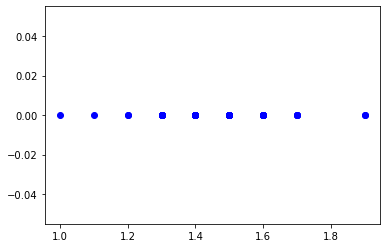

In [22]:
plt.plot(setosa['petal_length'], np.zeros_like(setosa['petal_length']), 'bo')
plt.show()

In [ ]:
# We have created a graph to see insights about petal_length of setosa flowers.
# setosa has 50 values but it is showing only 9 points in the plot. Because values are repeated.
# Let's see which value is repeated how many times.

In [23]:
setosa.petal_length.value_counts()

1.5    14
1.4    12
1.3     7
1.6     7
1.7     4
1.2     2
1.9     2
1.1     1
1.0     1
Name: petal_length, dtype: int64

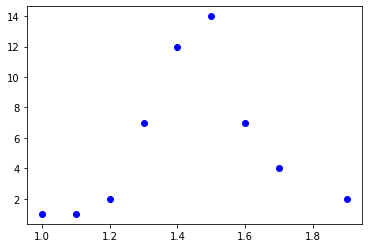

In [25]:
# It looks like there are only 9 unique values which are repeated.
# let's create a plot to see whic value is repted how many times.

plt.plot(setosa.petal_length.value_counts(), 'bo')

In [31]:
setosa.petal_length.unique()

array([1.4, 1.3, 1.5, 1.7, 1.6, 1.1, 1.2, 1. , 1.9])

<BarContainer object of 9 artists>

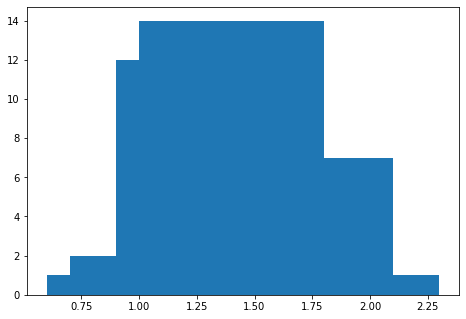

In [30]:
# Now instead of crating dots for each point we can sow them using bars.
# but barplot needs both x and y. So here x = unique values. y = there count.

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(setosa.petal_length.unique(), setosa.petal_length.value_counts())

In [32]:
# Now this barplot is lokking like a histogram.

### Slightly same concept for 1D plot.

In [33]:
# We have already created seperate dataframes of each class.
# Now we will create x = petal_length and y = 0. For all 3 classes on single plot.

In [38]:
np.zeros_like(setosa.petal_length)  # 50 zeros so number of x == number of y for plot.

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

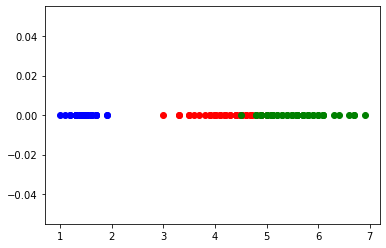

In [39]:
plt.plot(setosa.petal_length, np.zeros_like(setosa.petal_length), 'bo')
plt.plot(versi.petal_length, np.zeros_like(versi.petal_length), 'ro')
plt.plot(virgi.petal_length, np.zeros_like(virgi.petal_length), 'go')
plt.show()

In [40]:
# Now points are overlaping each other. Also we have ploted virgi after the versi so it's hiding versi's points.
# As in our example we have set y = petal_lenght.value_counts().

# Here we will do slightly different thing.
# imagine if we further break our x scale in smaller parts.
# x is from 1 to 7. suppose we break 1 to 2 into 5 parts. 2 to 3 into 5 parts and so on.
# We will get 35 parts. Now count how many values lie in each part and make it y value.
# Ex 1.1, 1.2, 1.2, 1.24 lies in x from 1 to 1.25     so y = 4
# Ex 2.6, 2.6, 2.9 lies in x from 2.5 to 3            so y = 3

# Now make plot of these x regions and y values.
# The thing which we will get will be an histogram or distplot. To show how values are distributed in x.

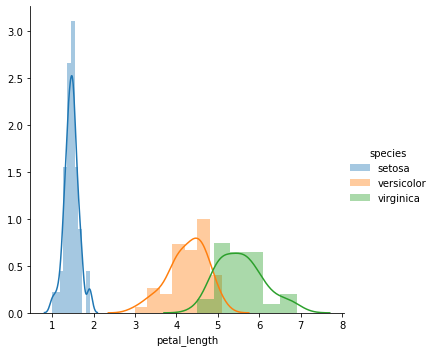

In [42]:
sns.FacetGrid(iris, hue='species', height=5) \
   .map(sns.distplot, 'petal_length') \
   .add_legend()
plt.show()

In [43]:
# Now here height of the bar will show how many points lie in that region.
# The lines in the plot are PDF. Probability Distribution functions. For now just rememmber it's smooth histogram.

# This distribution plot also works as density plot. Because it shows density of values in a given region.

### Use of this plot to create model.

In [44]:
# Now suppose we have to create a classification model based on just petal_length. It would look like this.

# if pl <= 2: setosa
# elif pl <= 4.7 : virsicolor
# elif pl >= 4.7 : virginica

# Why we have chosen 4.7 as threshold value. There many values less than 4.7 but they are virginica.
# also values > 4.7 are versicolor.

# We have taken 4.7 because it is intersection of PDF lines. Yes there are errors in our model.
# But we have only one parameter. Also for a value 4.5 it's a greator probability that it's a versicolor than virginica.
# for a pl = 4.8 porbaility of being virginica is high than versicolor.

#### What is a histogram
https://statistics.laerd.com/statistical-guides/understanding-histograms.php

https://www.mathsisfun.com/data/histograms.html